In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import *

import warnings
warnings.filterwarnings('ignore')

# Homework 5
## Data

In [2]:
df = pd.read_csv("../../clustering.csv", header= None)
df = df.rename(columns = {0:"V1", 1:"V2"})

In [3]:
df

,V1,V2
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


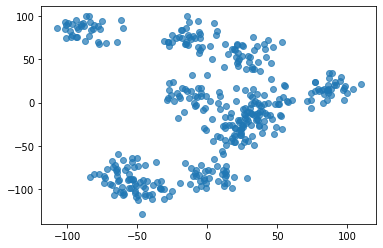

In [4]:
plt.scatter(df.V1, df.V2, alpha = 0.7)

## Methods and evaluation

Starting from evaluation, how will we know if our clasterization is good? 
We will use following metrics:

In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances

And follwing models: 

In [33]:
def initialise_methods(n):
    methods = [
        KMeans(n_clusters = n, random_state= 1 ),
        MiniBatchKMeans(n_clusters= n,  random_state= 1 ),
        SpectralClustering(n_clusters = n,eigen_solver='arpack', affinity="nearest_neighbors",  random_state= 1 ),
        Birch(n_clusters= n), 
    ]

    return methods

names = ["KMeans","MiniBatchKMeans","SpecClust","Birch"]

Do this methods even work? 

In [34]:
automatic_menthods = [
        AffinityPropagation(),
        MeanShift(),
        DBSCAN()

    ]

In [35]:
methods = initialise_methods(n = 9)

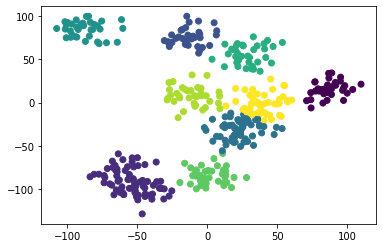

In [36]:
df2 = df 
df2["label"] =  methods[0].fit_predict(df2)
plt.scatter(df2.V1, df2.V2, c = df2.label)

In [37]:
silhouette_score(df.iloc[:,:2], methods[0].labels_)

0.5537911200848429

Works! 

## Number of clusters

In [38]:

results = pd.DataFrame(columns= ["k","name","ss","chs","dbs"])
scores = []

index = 0
for k in range(2, 20):
    
    methods = initialise_methods(k)
    
    for i in range(len(methods)) : 
        
        method = methods[i]
        name = names[i]
        predicted = method.fit_predict(df)
        
        if name == "KMeans" : 
            wcss = method.score(df) * -1 # score returns -WCSS
            scores.append(wcss)
        
        ss  = silhouette_score(df, predicted) 
        chs = calinski_harabasz_score(df, predicted) 
        dbs = davies_bouldin_score(df, predicted) 
        
        row = {'k': [k], "name" : [name], "ss" : [ss], "chs" : [chs], "dbs" : [dbs]}
        row = pd.DataFrame(data = row)
        
        results = pd.concat([results, row])
        




In [39]:
results

,k,name,ss,chs,dbs
0,2,KMeans,0.452604,358.492995,0.801698
0,2,MiniBatchKMeans,0.433414,354.162019,0.864947
0,2,SpecClust,0.423922,136.821416,0.553398
0,2,Birch,0.468934,345.610618,0.724523
0,3,KMeans,0.517244,571.627049,0.679146
...,...,...,...,...,...
0,18,Birch,0.391148,976.719384,0.915101
0,19,KMeans,0.377355,1013.220334,0.951423
0,19,MiniBatchKMeans,0.388046,954.493468,0.947393
0,19,SpecClust,0.367573,1016.386175,0.955894


Visualising the results, note that in Davies-Bouldin index the less the better

Text(0.5, 1.0, 'silhouette score')

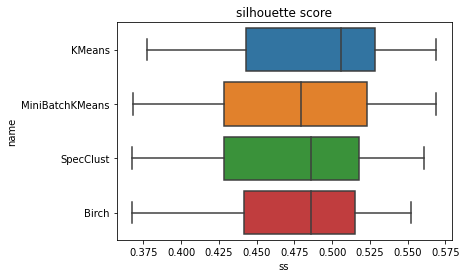

In [40]:
sns.boxplot(x = "ss", y = "name", data = results).set_title("silhouette score")

Text(0.5, 1.0, 'Calinski-Harabasz score')

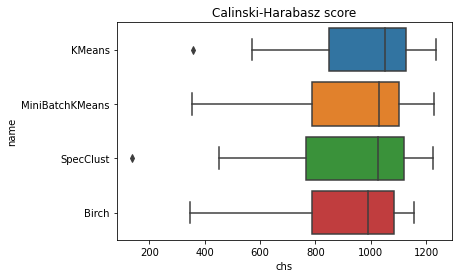

In [41]:
sns.boxplot(x = "chs", y = "name", data = results).set_title("Calinski-Harabasz score")

Text(0.5, 1.0, 'Davies-Bouldin index score')

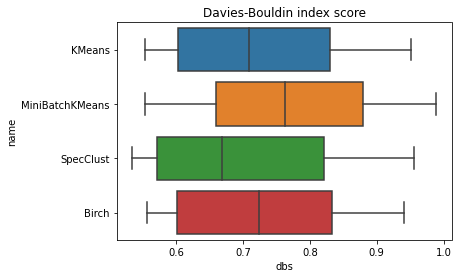

In [42]:
sns.boxplot(x = "dbs", y = "name", data = results).set_title("Davies-Bouldin index score")

### Analysis of results

Elbow method for KMeans

In [43]:
res = results.loc[results.name == "KMeans",:]

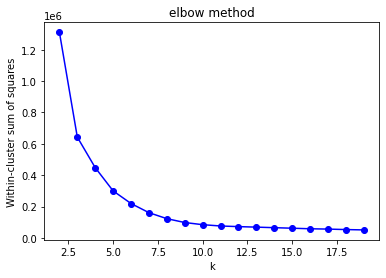

In [44]:
x_ticks = list(range(2, 20))
plt.plot(x_ticks, scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('elbow method')
plt.show()

Optimal number of clusters seems to be within 7-10 range

#### Let's try **silhouette score**

Text(0.5, 1.0, 'silhouette score per number of clusters')

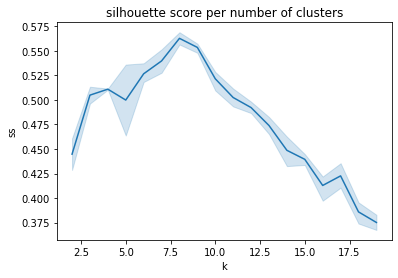

In [45]:
sns.lineplot(x = "k", y = "ss", data = results).set_title("silhouette score per number of clusters")

8 seems to be ideal number of clusters for this metric. This wass plot for all models. Let's just wee another one for different models

Text(0.5, 1.0, 'silhouette score per number of clusters')

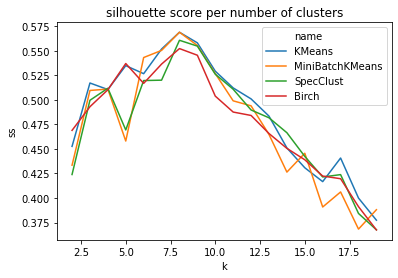

In [46]:
sns.lineplot(x = "k", y = "ss", hue = "name",  data = results).set_title("silhouette score per number of clusters")

Only Birch has optimal number that is not 8 (and it is 5). Best methods are KMeans and MiniBatchKmeans for number of clusters equal to 8.

#### **Calinski-Harabasz**

Text(0.5, 1.0, 'Calinski-Harabasz per number of clusters')

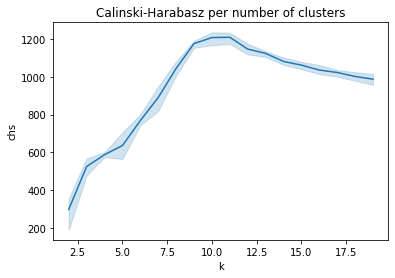

In [47]:
sns.lineplot(x = "k", y = "chs", data = results).set_title("Calinski-Harabasz per number of clusters")

In this metric the best number of clusters seems to be 11. Like in situation before let's plot individual methods

Text(0.5, 1.0, 'Calinski-Harabasz score per number of clusters')

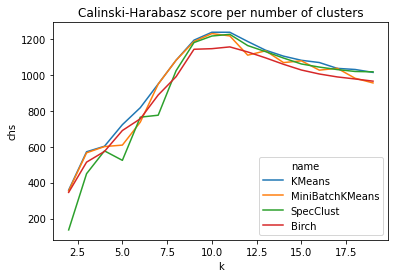

In [48]:
sns.lineplot(x = "k", y = "chs", hue = "name",  data = results).set_title("Calinski-Harabasz score per number of clusters")

Also here Birch method differs from others. Other methods are preety close to each other.

#### **Davies-Bouldin index** 

Text(0.5, 1.0, 'Davies-Bouldin index score per number of clusters')

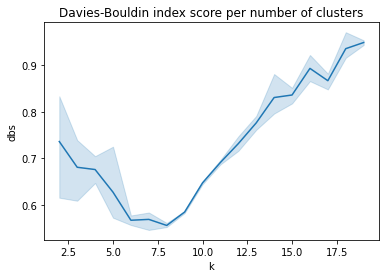

In [49]:
sns.lineplot(x = "k", y = "dbs", data = results).set_title("Davies-Bouldin index score per number of clusters")

Here the lower `dbs` the better theretore optimal number of clusters iw somewhere between 6-8

Text(0.5, 1.0, 'Davies-Bouldin index score per number of clusters')

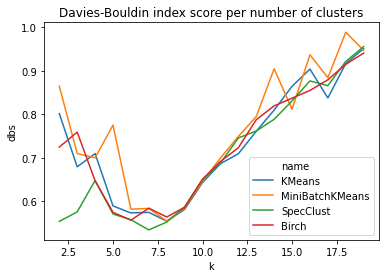

In [50]:
sns.lineplot(x = "k", y = "dbs", hue = "name",  data = results).set_title("Davies-Bouldin index score per number of clusters")

Here we can see that the winner is spectral clustering with optimum in 7.

## Visualization of clusters 

We will take winner from every metric and look how it clusters the data.

In [51]:
results.iloc[np.where(results.ss == max(results.ss), True, False), :]

,k,name,ss,chs,dbs
0,8,KMeans,0.569,1081.037274,0.553906
0,8,MiniBatchKMeans,0.569,1081.037274,0.553906


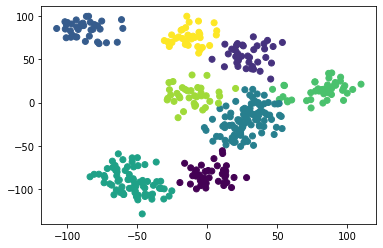

In [52]:
method = MiniBatchKMeans(n_clusters=8, random_state= 1)

df2 = df 
df2["label"] =  method.fit_predict(df2)
plt.scatter(df2.V1, df2.V2, c = df2.label)

In [53]:
results.iloc[np.where(results.chs == max(results.chs), True, False), :]

,k,name,ss,chs,dbs
0,10,KMeans,0.529318,1236.653329,0.642957


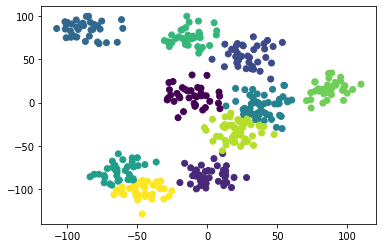

In [54]:
method = KMeans(n_clusters=10, random_state= 1)

df2 = df 
df2["label"] =  method.fit_predict(df2)
plt.scatter(df2.V1, df2.V2, c = df2.label)

In [55]:
results.iloc[np.where(results.dbs == min(results.dbs), True, False), :]

,k,name,ss,chs,dbs
0,7,SpecClust,0.520129,774.982283,0.533823


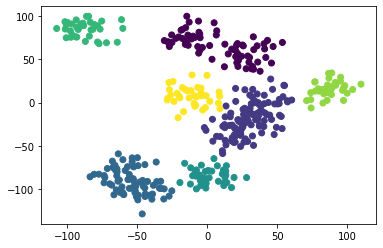

In [56]:
method = SpectralClustering(n_clusters=7, random_state= 1, eigen_solver='arpack', affinity="nearest_neighbors")

df2 = df 
df2["label"] =  method.fit_predict(df2)
plt.scatter(df2.V1, df2.V2, c = df2.label)

All results seem reasonable. What is reassuring is that in elbow method for KMeans we also judged that optimal numbers will be in range 7-10. 

## Conclusion

Getting optimal number of clusters is dependent on the metric that we choose. Just like in classification tasks the metric should be choosen based on the task. Here we did not have this leverage. For different metrics we got different results altough they were similar (7-10). They are consistent with "Elbow method". And with visual evluation.

In `sklearn` there are some automatic methods that choose number of clusters on their own. Let's see how they take on this task.

### Bonus - automatic method

AffinityPropagation - more on this method [sklearn docs](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation)

In [57]:
method = AffinityPropagation()
preds = method.fit_predict(df)

In [58]:
preds

array([ 5,  0,  9,  3,  0,  4, 10,  1,  6,  3,  0,  4,  2,  7,  4,  8,  4,
        9,  8,  7,  4,  1,  0,  5,  7, 10,  0, 10,  8,  9, 10,  0,  7,  2,
        8,  3, 10,  4,  3, 10,  6,  3,  4,  1,  8, 10,  8,  6,  7,  6,  1,
        6,  9,  9,  1,  7, 10,  1,  8,  4,  2,  0,  7,  7,  5,  5,  6,  9,
        2,  1,  1,  3,  5,  4,  1,  2,  8,  7,  0,  4,  2, 10,  0,  6,  5,
        6,  9,  0, 10,  5,  9,  3,  9,  8,  9,  3,  7,  1,  4,  2,  8,  5,
        3,  9,  8,  5,  6,  5,  2,  5,  3,  4,  1,  9,  8,  8,  9, 10,  4,
        7,  9,  0,  4,  5,  0,  3,  3,  2,  5,  3,  0,  8,  6,  3,  0, 10,
        7,  9,  4,  8, 10,  4,  8,  6,  0,  6,  0,  6,  8,  2,  7,  4,  0,
        6,  4,  1,  4,  7,  5,  9,  6,  0,  4,  5,  3,  1,  1,  6,  7,  4,
        3,  2,  0,  4,  4,  2,  3,  2,  1,  8,  1,  4,  0, 10,  6,  9,  8,
        3,  1,  8,  3,  4,  7,  1,  2,  1,  6,  2,  7,  1,  5,  1,  0,  4,
        2,  3,  4,  0,  5,  8,  1,  5,  4, 10,  2,  3,  1,  4,  0,  3,  1,
        6,  4, 10,  2, 10

This method judged optimal number of clusters to be 11. just like optimal number in.

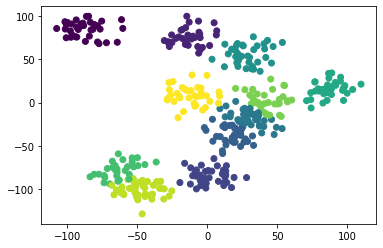

In [59]:
df2 = df 
df2["label"] =  preds
plt.scatter(df2.V1, df2.V2, c = df2.label)

And this is how it looks

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu "Wstęp do Uczenia Maszynowego" została wykonana przeze mnie samodzielnie